## Processing Steps

1. Determine noise parameters of noise model
    - This will be based on <a href="http://www.cs.tut.fi/~foi/papers/Foi-PoissonianGaussianClippedRaw-2007-IEEE_TIP.pdf">this paper</a>. I will be using the <a href="">ClipPoisGaus_stdEst2D</a> code provided by the authors. 
2. Spatial filtering with (block matching 3d filter) OR (extended empirical orthogonal functions)
3. Improve the temporal signal (Extended Kalman Filter)
4. Determine the Optical Flow with Farneback's algorithm (comparing polynomial approximations)

## Notes
- Choose the number of principle components to keep, $k$, based on how much variance, $\alpha$, we want to maintain. For example $$\frac{\sum_{i=1}^{k}\lambda_i}{\sum_{i=1}^{N}\lambda_i} \ge \alpha$$
- Use Noise Assisted Data Analysis (NADA) techniques. Similar to what was done at COAPS. Come up with an approximation to the magnitude of the noise in the signal (talk to James) then add thousands of noisy images to the original data and average them out.
- Keep in mind the notion of 'relative fluorescence'. Average the first 32 frames where no stimulus is being applied to approximate the "base line" for the fluorescence, $f_0$. i.e. $$f_0 = \frac{1}{32}\sum_{i=1 }^{32}f_i$$ Then the relative fluorescence for the k$^{th}$ frame will be $$\frac{\Delta f_k}{f} = \frac{f_k-f_0}{f_0}$$
- If sampling frequency is twice the frequency of the signal the sampling theorem says no aliasing will occur
- 60Hz noise is common in data obtained from electronic sensors being powered by a 60 Hz alternating current
- Ask about the "Figure of Merit" and the "Recording Efficiency" for the Prarie two-photon microscope
- Whitening makes the autocorrelation of the signal "narrower". This can help to localize in time. However it may also reduce (make worse) the SNR
- SNR $= \frac{P_s}{P_n} = \bigg(\frac{A_s}{A_n}\bigg)^2$ where $P$ is the power and $A$ is the amplitude. Use the RMS of the powers or amplitudes to determine the single coefficient.
- To determine the Astrocyte morphology find the pixel-wise maximum of the relative fluorescence $\Delta f_k$
- Karhunen-Loève Theorem (KL): Building blocks for all statistical decomposition techniques
    - Karhunen-Loève Transform (KLT) decorrelates the signal
    - The Karhunen–Loève expansion minimizes the total mean square error
    - Principle Components Analysis 
        - Developed by Harold Hotelling in 1933
        - Discrete analogue to the KLT 
        - Favored because it reduces to a simple numerical eigen value problem
        - The total variance is equal to the sum of the eigen values
    - KL is known by many names, PCA, Proper Orthogonal Decomposition (POD), Empirical Orthogonal Functions (EOF)
    - Karhunen–Loève expansion is closely related to the Singular Value Decomposition. If one has independent vector observations from a vector valued stochastic process then the left singular vectors are maximum likelihood estimates of the ensemble KL expansion
    - Unlike the PCA, the EOF finds both spatial AND temporal patterns

## Some Examples Demonstrating Concepts Above

In [13]:
%matplotlib inline
from load_environment import * # python file with imports and basics to set up this computing environment

-- Loading Data...
	- Reading from tiff file media/testData.tif...


ImportError: No module named libtiff

#### First we will take a look at the fluorescence "base line"

In [2]:
f0 = np.average(data[:32], axis=0)
plt.imshow(f0); plt.title("Average of First 32 Frames"); plt.show()

NameError: name 'np' is not defined

#### Now compare the fluorescence of a regular signal to its relative fluorescence

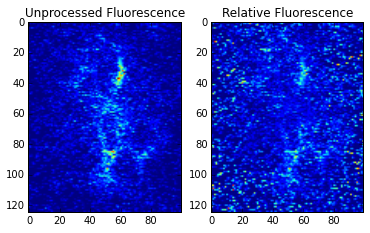

In [36]:
plt.subplot(121)
f41 = data[41]
plt.imshow(f41); plt.title("Unprocessed Fluorescence")
plt.subplot(122)
plt.imshow((f41-f0)/f0); plt.title("Relative Fluorescence"); plt.show()

#### Now lets compare the maximum of each individual time signal within the relative fluorescences with the maximum of the regular data and the signal mean

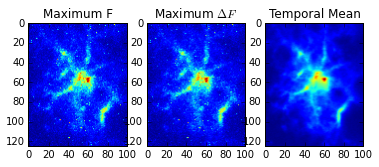

In [37]:
cpy = data[32:].copy() # Not to ruin future experiments on the original data
plt.subplot(131); plt.imshow(cpy.max(axis=0)); plt.title("Maximum F"); 
for f in cpy:
    f = (f-f0)/f0
maxFluorescence = cpy.max(axis=0)
plt.subplot(132); plt.imshow(maxFluorescence); plt.title("Maximum $\Delta F$"); 
plt.subplot(133); plt.imshow(np.average(cpy, axis=0)); plt.title("Temporal Mean"); plt.show()